# Overview
- Contest page: https://operations.nfl.com/the-game/big-data-bowl/?utm_source=Direct
- GitHub: https://github.com/nfl-football-ops/Big-Data-Bowl

- Phase 1 ends: <b>January 22, 2019</b>
    - Notification of finalists by January 30, 2019

- Themes To address (Choose one)
    - https://operations.nfl.com/the-game/big-data-bowl/big-data-bowl-themes/
    - Understanding speed
    - Propose a rule change
    - Identify best receiver-route combinations

- Scoring Criteria
    - Innovation, Accuracy, Relevance, Clarity (10 each)

### How it all works
- Deliver your report. You must submit your report as a PDF file to BDBsubmit@nfl.com by 11:59 p.m. ET on Jan. 22, 2019 to be eligible. The maximum page length for this PDF file, including all references, tables, figures, and supporting files, is <b>12 pages</b>. The maximum file size is 20 MB. For verification purposes, please ensure that the person submitting the report is the same person who completed the online registration form. If you are submitting on behalf of a group, please include your name, your group name, as well as the names and email addresses of all persons in your group, when you submit your report.

- Present your findings. NFL staff and club analytics personnel will determine the eight (8) Finalist Prize winners — four (4) Finalists from each category (students and open) — who will advance to the final presentation period in Indianapolis, IN. Each Finalist (and one (1) guest) will receive a 2-night trip to the NFL Combine from Feb. 26-28, 2019 to present their report.

- After all Finalist Prize winners have presented, two (2) Grand Prize winners will be announced — one (1) from each category (students and open). Each will receive four (4) tickets to a 2019 regular season NFL game and a $1,000 NFLshop.com gift card.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
sns.set()

## Game Data
- The games.csv file contains game-level information for each game from the first 6 weeks of the 2017 season. 
- The key variable is <b>gameId</b>.
- season: Season of game (numeric)
- week: Week of game, 1 through 6 (numeric)
- gameDate: Game Date (time, mm/dd/yyyy)
- gameId: Game identifier, unique (numeric)
- gameTimeEastern: Start time of game (time, HH:MM:SS, EST)
- HomeScore: Final score for the home team (numeric)
- VisitorScore: Final score for the away team (numeric)
- homeTeamAbbr: Home team three-letter code (text)
- visitorTeamAbbr: Visiting team three-letter code (text)
- homeDisplayName: Home team name (text)
- visitorDisplayName: Visiting team name (text)
- Stadium: Stadium (text)
- Location: City (text)
- StadiumType: Type of stadium (text)
- Turf: Surface of stadium (text)
- GameLength: Time the game took to complete (time, HH:MM:SS)
- GameWeather: Game weather (text)
- Temperature: Temperature in Fahrenheit, drawn roughly at the start of the game (numeric)
- Humidity: Humidity (numeric)
- WindSpeed: Wind speed, in miles-per-hour (numeric)
- WindDirection: Direction of wind (text)

In [2]:
game_df = pd.read_csv('data/games.csv')
print(game_df.shape)
game_df.tail(1)

(91, 21)


,season,week,gameDate,gameId,gameTimeEastern,HomeScore,VisitorScore,homeTeamAbbr,visitorTeamAbbr,homeDisplayName,...,Stadium,Location,StadiumType,Turf,GameLength,GameWeather,Temperature,Humidity,WindSpeed,WindDirection
90,2017,6,10/15/2017,2017101501,13:00:00,24,27,BAL,CHI,Baltimore Ravens,...,M&T Stadium,"Baltimore, Md.",Outdoor,Natural,03:26:00,Partly Sunny,69.0,87.0,7,s


- **91 total games available**
- Things to consider: team specific formations against a particular team, maybe get granularity with the score of the game.
---
## Player Data
- The players.csv file contains player-level information from players that participated in at least one play during the first six weeks of the 2017 regular season. 
- The key variable is <b>nflId</b>.
- nflId: Player identification number, unique across players (numeric)
- FirstName: First name of player (text)
- LastName: Last name of player (text)
- PositionAbbr: Position of player (text)
- EntryYear: Year in which player entered NFL (numeric)
- DraftRound: Round in which player was drafted --NULL for players not drafted (numeric)
- DraftNumber: Overall pick number among drafted players (numeric)
- Height: Player height in feet/inches (text)
- Weight: Player weight in pounds (numeric)
- College: Player college (text)

In [3]:
player_df = pd.read_csv('data/players.csv')
print(player_df.shape)
player_df.tail(1)

(1713, 10)


,nflId,FirstName,LastName,PositionAbbr,EntryYear,DraftRound,DraftNumber,Height,Weight,College
1712,2553796,Quinton,Dunbar,CB,2015,NaN,NaN,"6'02""",197,Florida


In [4]:
player_df.describe()

,nflId,EntryYear,DraftRound,DraftNumber,Weight
count,1.713000e+03,1713.000000,1185.000000,1185.000000,1713.000000
mean,2.358148e+06,2013.375949,3.413502,99.707173,244.998249
std,6.251065e+05,3.171858,1.924983,70.428223,45.796271
min,2.340000e+02,1996.000000,1.000000,1.000000,158.000000
25%,2.532873e+06,2012.000000,2.000000,38.000000,205.000000
50%,2.543860e+06,2014.000000,3.000000,88.000000,236.000000
75%,2.555343e+06,2016.000000,5.000000,157.000000,287.000000
max,2.559368e+06,2017.000000,7.000000,256.000000,355.000000


In [5]:
player_df[player_df['DraftNumber'] == 256]

,nflId,FirstName,LastName,PositionAbbr,EntryYear,DraftRound,DraftNumber,Height,Weight,College
120,89802,Ryan,Succop,K,2009,7.0,256.0,"6'02""",218,South Carolina


- May want to consider converting height string to a metric height (meters)
- The most recent NFL draft had 32 teams who choose players across 7 rounds = 224 draft picks
    - Although in this dataset the highest draft number was 256

## Play Data
- The plays.csv file contains play-level information from each game from the first 6 weeks of the 2017 season. 
- The key variables are <b>gameId and playId</b>.
- gameId: Game identifier, unique (numeric)
- playId: Play identifier, not unique across games (numeric)
- quarter: Game quarter (numeric)
- GameClock: Time on game clock at start of play (time, counting down from 15:00, MM:SS)
- down: Down (numeric)
- yardsToGo: Distance needed for a first down (numeric)
- possessionTeam: 3-letter team code corresponding to team that has the ball
- yardlineSide: 3-letter team code corresponding to line-of-scrimmage (text)
- yardlineNumber: Yard line at line-of-scrimmage (numeric)
- **offenseFormation**: how is the offense set up
- personnel.offense: Personnel used by offensive team (text)
- defendersInTheBox: Number of defenders in close proximity to line-of-scrimmage (numeric)
- numberOfPassRushers: Number of pass rushers (numeric)
- personnel.defense: Personnel used by defensive team (text)
- HomeScoreBeforePlay: Home score prior to the play (numeric)
- VisitorScoreBeforePlay: Visiting team points at the end of the play (numeric)
- HomeScoreAfterPlay: Home team points at the end of the play (numeric)
- VisitorScoreAfterPlay: Visitor team points at the end of the play (numeric)
- isPenalty: TRUE/FALSE for whether or not a penalty was called on the play (binary)
- isSTPlay: TRUE/FALSE for whether or not the play is labelled a special teams play (binary)
- SpecialTeamsPlayType: Type of play if isSTPlay == TRUE (text)
- KickReturnYardage: Return yardage among special teams plays (numeric)
- **PassLength**: Pass length, in yards (numeric); by yardline distance relative to line of scrimmage
- PassResult: Result of pass play (text, C: caught, I: incomplete, IN: intercepted, R: run, S: sack)
- YardsAfterCatch: Yardage receiver gained after a pass completion (numeric)
- **PlayResult**: Result of play, in yards (numeric); **for kickoffs and punts it is the difference between distance of punt and return yardage**
- playDescription: Description of play (text)

In [6]:
play_df = pd.read_csv('data/plays.csv')
print(play_df.shape)
play_df.head(3)

(14193, 27)


,gameId,playId,quarter,GameClock,down,yardsToGo,possessionTeam,yardlineSide,yardlineNumber,offenseFormation,...,VisitorScoreAfterPlay,isPenalty,isSTPlay,SpecialTeamsPlayType,KickReturnYardage,PassLength,PassResult,YardsAfterCatch,PlayResult,playDescription
0,2017091004,37,1,15:00:00,0,0,DET,DET,35.0,NaN,...,0,False,True,Kickoff,23.0,NaN,NaN,NaN,42,K.Redfern kicks 65 yards from DET 35 to ARZ 0....
1,2017091004,73,1,14:54:00,1,10,ARI,ARI,23.0,SHOTGUN,...,0,False,False,NaN,NaN,-2.0,C,6.0,4,(14:54) (Shotgun) C.Palmer pass short right to...
2,2017091004,97,1,14:16:00,2,6,ARI,ARI,27.0,SINGLEBACK,...,0,False,False,NaN,NaN,NaN,NaN,NaN,2,(14:16) Da.Johnson up the middle to ARZ 29 for...


In [7]:
play_df.describe()

,gameId,playId,quarter,down,yardsToGo,yardlineNumber,defendersInTheBox,numberOfPassRushers,HomeScoreBeforePlay,VisitorScoreBeforePlay,HomeScoreAfterPlay,VisitorScoreAfterPlay,KickReturnYardage,PassLength,YardsAfterCatch,PlayResult
count,1.419300e+04,14193.000000,14193.000000,14193.000000,14193.000000,14013.000000,11556.000000,6710.000000,14193.000000,14193.000000,14193.000000,14193.000000,704.000000,6261.000000,3937.000000,14193.000000
mean,2.017096e+09,2085.233848,2.560840,1.813500,7.861129,28.633340,6.474386,4.217288,11.466357,9.921581,11.613471,10.059395,13.218750,8.263696,4.958090,9.325865
std,4.558257e+03,1231.235804,1.128938,1.131731,4.705963,12.368636,1.097001,0.888910,10.256910,9.232038,10.295772,9.270863,40.483042,10.158957,6.718159,14.987104
min,2.017091e+09,35.000000,1.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-999.000000,-15.000000,-8.000000,-86.000000
25%,2.017092e+09,1023.000000,2.000000,1.000000,4.000000,20.000000,6.000000,4.000000,3.000000,0.000000,3.000000,0.000000,5.000000,2.000000,0.000000,0.000000
50%,2.017092e+09,2081.000000,3.000000,2.000000,10.000000,30.000000,6.000000,4.000000,10.000000,7.000000,10.000000,8.000000,13.000000,6.000000,3.000000,4.000000
75%,2.017101e+09,3114.000000,4.000000,3.000000,10.000000,38.000000,7.000000,5.000000,17.000000,17.000000,17.000000,17.000000,22.000000,12.000000,7.000000,11.000000
max,2.017102e+09,5531.000000,5.000000,4.000000,40.000000,49.000000,11.000000,8.000000,57.000000,42.000000,57.000000,42.000000,103.000000,60.000000,77.000000,90.000000


In [8]:
# How play is described
play_df['playDescription'][2]

'(14:16) Da.Johnson up the middle to ARZ 29 for 2 yards (E.Ansah).'

In [9]:
play_df['offenseFormation'].value_counts()

SHOTGUN       5783
SINGLEBACK    3107
I_FORM        1367
EMPTY          880
PISTOL         143
JUMBO          121
WILDCAT         18
ACE              1
Name: offenseFormation, dtype: int64

- We have <b>14193 plays</b> to work with in our analysis
- 6.47 defenders in the box on average (count=11556)
- 4.22 pass rushers per play on average (count=6710)
- 8.27 pass length on average (count=6261)
    - 4.96 yards after catch on average (count=3937)

## Preprocessing of play data

In [164]:
## Filter out special teams plays
where_condition = play_df['isSTPlay'] == 1
play_df[where_condition]['SpecialTeamsPlayType'].value_counts()

regular_play_df = play_df[~where_condition].copy()
droppers = ['isSTPlay', 'SpecialTeamsPlayType', 'KickReturnYardage']
regular_play_df.drop(columns=droppers, inplace=True)
regular_play_df.reset_index(inplace=True, drop=True)
print(regular_play_df.shape)
regular_play_df.describe()

(11558, 24)


,gameId,playId,quarter,down,yardsToGo,yardlineNumber,defendersInTheBox,numberOfPassRushers,HomeScoreBeforePlay,VisitorScoreBeforePlay,HomeScoreAfterPlay,VisitorScoreAfterPlay,PassLength,YardsAfterCatch,PlayResult
count,1.155800e+04,11558.000000,11558.000000,11558.000000,11558.000000,11393.000000,11556.000000,6705.000000,11558.000000,11558.000000,11558.000000,11558.000000,6256.000000,3934.000000,11558.000000
mean,2.017096e+09,2095.697179,2.569216,1.786468,8.715954,28.695164,6.474386,4.220433,11.342101,9.828777,11.463921,9.935716,8.264066,4.942044,5.201765
std,4.559297e+03,1234.562248,1.132256,0.817679,3.989804,12.673149,1.097001,0.881746,10.214856,9.232417,10.249937,9.259253,10.160973,6.694731,9.057427
min,2.017091e+09,48.000000,1.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000,-8.000000,-86.000000
25%,2.017092e+09,1023.000000,2.000000,1.000000,6.000000,20.000000,6.000000,4.000000,3.000000,0.000000,3.000000,0.000000,2.000000,0.000000,0.000000
50%,2.017092e+09,2098.500000,3.000000,2.000000,10.000000,29.000000,6.000000,4.000000,10.000000,7.000000,10.000000,7.000000,5.000000,3.000000,3.000000
75%,2.017101e+09,3134.750000,4.000000,2.000000,10.000000,40.000000,7.000000,5.000000,17.000000,17.000000,17.000000,17.000000,12.000000,7.000000,8.000000
max,2.017102e+09,5531.000000,5.000000,4.000000,40.000000,49.000000,11.000000,8.000000,57.000000,42.000000,57.000000,42.000000,60.000000,77.000000,90.000000


We know the result of all the plays so that's good. There seems to be **6256 pass plays** in which **3934 were caught**, which lines up pretty well with online sources average completion percentage. Since will be looking at the data based off of offensive passing plays I will filter down these plays based on if PassLength is not NaN

In [165]:
# Filter for only pass plays
pass_play_df = regular_play_df[~regular_play_df['PassLength'].isna()]
pass_play_df.reset_index(inplace=True, drop=True)
pass_play_df.describe()

,gameId,playId,quarter,down,yardsToGo,yardlineNumber,defendersInTheBox,numberOfPassRushers,HomeScoreBeforePlay,VisitorScoreBeforePlay,HomeScoreAfterPlay,VisitorScoreAfterPlay,PassLength,YardsAfterCatch,PlayResult
count,6.256000e+03,6256.000000,6256.000000,6256.000000,6256.000000,6159.000000,6255.000000,6252.000000,6256.000000,6256.000000,6256.000000,6256.000000,6256.000000,3934.000000,6256.000000
mean,2.017096e+09,2137.147698,2.591272,1.938459,8.943254,29.376847,6.118465,4.205534,11.556426,9.922474,11.701566,10.065377,8.264066,4.942044,7.026694
std,4.558655e+03,1220.191580,1.122111,0.837692,4.051839,12.442895,1.013281,0.885989,10.064969,9.230189,10.109139,9.258299,10.160973,6.694731,9.806852
min,2.017091e+09,51.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000,-8.000000,-42.000000
25%,2.017092e+09,1105.000000,2.000000,1.000000,6.000000,21.000000,6.000000,4.000000,3.000000,0.000000,3.000000,0.000000,2.000000,0.000000,0.000000
50%,2.017092e+09,2126.000000,3.000000,2.000000,10.000000,30.000000,6.000000,4.000000,10.000000,7.000000,10.000000,9.000000,5.000000,3.000000,4.000000
75%,2.017101e+09,3150.000000,4.000000,3.000000,10.000000,40.000000,7.000000,5.000000,17.000000,17.000000,17.000000,17.000000,12.000000,7.000000,11.000000
max,2.017102e+09,5531.000000,5.000000,4.000000,35.000000,49.000000,11.000000,8.000000,57.000000,42.000000,57.000000,42.000000,60.000000,77.000000,88.000000


In [166]:
# Check for missing values
for column in pass_play_df.columns:
    number_of_na = len(pass_play_df[pass_play_df[column].isna()])
    if number_of_na > 0:
        print(column, 'is missing', number_of_na, 'values')

yardlineSide is missing 97 values
yardlineNumber is missing 97 values
offenseFormation is missing 6 values
personnel.offense is missing 1 values
defendersInTheBox is missing 1 values
numberOfPassRushers is missing 4 values
personnel.defense is missing 1 values
PassResult is missing 2 values
YardsAfterCatch is missing 2322 values


In [167]:
# Check playDescription for why anomalies might be occuring
column = 'offenseFormation'
for element in pass_play_df[pass_play_df[column].isna()]['playDescription']:
    print(element)

(14:29) J.Flacco pass short middle to M.Williams to BLT 40 for 13 yards (J.Collins).
(11:31) (Shotgun) K.Hogan pass incomplete short middle to C.Coleman.
(8:24) Direct snap to M.Gray.  M.Gray pass incomplete short left to J.Landry.
(:03) (No Huddle) R.Wilson spiked the ball to stop the clock.
(:35) (No Huddle) J.Goff spiked the ball to stop the clock.
(13:31) J.LeRibeus reported in as eligible.  D.Brees pass short right intended for M.Thomas INTERCEPTED by D.Slay [E.Ansah] at NO 39. D.Slay to NO 39 for no gain (M.Thomas). The Replay Official reviewed the interception ruling, and the play was Upheld. The ruling on the field stands.


- Notes:
    - The missing **yardlineNumber** and **yardlineSide** cases are where the start of the play is at the 50 yardline
    - Two null values for **passResult** were illegal forward passes and I will drop them from my analysis
    - 3 of 4 null values for **numberOfPassRushers** were illegal forward passes and I will drop them from my analysis
    - Will drop plays that have **spiked** and **illegal forward pass** in the **playDescription**

In [209]:
str1 = 'spiked'
str2 = 'Illegal Forward Pass'

pass_play_df = pass_play_df[~pass_play_df['playDescription'].str.contains(str1)]
pass_play_df = pass_play_df[~pass_play_df['playDescription'].str.contains(str2)]
pass_play_df.sort_values(by=['gameId', 'playId'], inplace=True)
pass_play_df.reset_index(inplace=True, drop=True)
pass_play_df.to_csv('data/plays-pass.csv', index=False) # Write out file for external use
pass_play_df.shape

(6234, 24)

In [210]:
# Check for missing values
for column in pass_play_df.columns:
    number_of_na = len(pass_play_df[pass_play_df[column].isna()])
    if number_of_na > 0:
        print(column, 'is missing', number_of_na, 'values')

yardlineSide is missing 96 values
yardlineNumber is missing 96 values
offenseFormation is missing 4 values
personnel.offense is missing 1 values
defendersInTheBox is missing 1 values
numberOfPassRushers is missing 1 values
personnel.defense is missing 1 values
YardsAfterCatch is missing 2303 values


So we now have a pretty clean dataset. There are still 4 plays that do not have an **offenseFormation**, but I'll live with it.

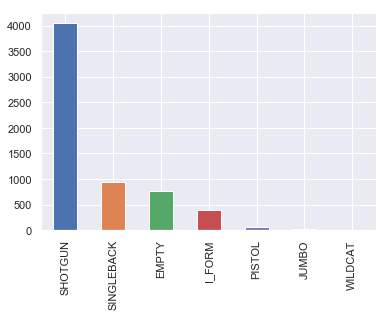

SHOTGUN       4056
SINGLEBACK     942
EMPTY          768
I_FORM         390
PISTOL          51
JUMBO           19
WILDCAT          4
Name: offenseFormation, dtype: int64


In [16]:
# Quick histogram of offenseFormation
pass_play_df['offenseFormation'].value_counts().plot(kind='bar')
plt.show()
print(pass_play_df['offenseFormation'].value_counts())

## Tracking Data
- Files tracking_gameId_[gameId].csv contain player tracking data from game [gameId]. Nearly all plays from [gameId] are included; certain plays with incomplete or missing data are dropped. 
- The key variables are <b>gameId, playId, and nflId</b>.
- time: Time stamp of play (time, yyyy-mm-dd, hh:mm:ss)
- x: Player position along the long axis of the field, 0 - 120 yards. See Figure 1 below. (numeric)
- y: Player position along the short axis of the field, 0 - 53.3 yards. See Figure 1 below. (numeric)
- s: Speed in yards/second (numeric)
- dis: Distance traveled from prior time point, in yards (numeric)
- dir: Angle of player motion (deg), 0 - 360 degrees (numeric)
- event: Tagged play details, including moment of ball snap, pass release, pass catch, tackle, etc (text)
- nflId: Player identification number, unique across players (numeric)
- displayName: Player name (text)
- jerseyNumber: Jersey number of player (numeric)
- team: Team (away or home) of corresponding player (text)
- frame.id: Frame identifier for each play, starting at 1 (numeric)
- gameId: Game identifier, unique (numeric)
- playId: Play identifier, not unique across games (numeric)
- <b>91 datasets = 91 games</b>

I will be combining all the datasets into one master NGS dataset for my analysis notebook. Essentially just grabbing pertinent data from the offensive plays.

In [18]:
# File name subsets
year = 'tracking_gameId_2017'
months = ['09', '10']
days = ['07', '10', '11', '14', '17', '18', '21', '24', '25', '28', '01', '02', '05', '08', '09', '12', '15', '16']
games = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13']

ngs_all = pd.DataFrame()

for month in months:
    for day in days:
        for game in games:
            file_path = 'data/' + year + month + day + game + '.csv'
            try:
                ngs_data = pd.read_csv(file_path)
                print(ngs_data.shape)
                ngs_all = pd.concat([ngs_all, ngs_data], axis=0)
            except FileNotFoundError:
                continue
            print(file_path)
            
ngs_all.shape

(316025, 14)
data/tracking_gameId_2017090700.csv
(259217, 14)
data/tracking_gameId_2017091000.csv
(253238, 14)
data/tracking_gameId_2017091001.csv
(244651, 14)
data/tracking_gameId_2017091002.csv
(247641, 14)
data/tracking_gameId_2017091003.csv
(293204, 14)
data/tracking_gameId_2017091004.csv
(258152, 14)
data/tracking_gameId_2017091005.csv
(259507, 14)
data/tracking_gameId_2017091007.csv
(270790, 14)
data/tracking_gameId_2017091008.csv
(255889, 14)
data/tracking_gameId_2017091009.csv
(265822, 14)
data/tracking_gameId_2017091010.csv
(232461, 14)
data/tracking_gameId_2017091011.csv
(254219, 14)
data/tracking_gameId_2017091012.csv
(259466, 14)
data/tracking_gameId_2017091100.csv
(248062, 14)
data/tracking_gameId_2017091101.csv
(280278, 14)
data/tracking_gameId_2017091400.csv
(296368, 14)
data/tracking_gameId_2017091700.csv
(239427, 14)
data/tracking_gameId_2017091701.csv
(275621, 14)
data/tracking_gameId_2017091702.csv
(265949, 14)
data/tracking_gameId_2017091703.csv
(268532, 14)
data/tr

In [19]:
# Get unique play ids from passing plays dataset
passing_play_ids = pass_play_df.groupby(['gameId','playId']).size().reset_index().rename(columns={0:'count'})
passing_play_ids.drop(columns=['count'], inplace=True)

# Perform natural join of all ngs_data to get only data pertinent to passing plays
ngs_pass_plays = pd.merge(ngs_all, passing_play_ids,
                          how='inner',
                          on=['gameId', 'playId'])

# Memory Management
del ngs_all, passing_play_ids

ngs_pass_plays.shape

(11022124, 14)

In [20]:
# Write out file for external use
ngs_pass_plays.to_csv('data/NGS-pass.csv', index=False)

## Animations of player routes
Let's try mapping routes of players. They have been so kind to give us an index (frame.id) for a given play

In [211]:
def get_play(df, game_id, play_id):
    '''Create dataframe of just a particular play'''
    where_condition = ((df['playId'] == play_id) &
                      (df['gameId'] == game_id))
    new_df = df[where_condition].copy()
    return new_df

In [238]:
# Unique set of gamekey,playid's
ngs_pass_play_ids = ngs_pass_plays.groupby(['gameId','playId']).size().reset_index().rename(columns={0:'count'})

# Get the play and order appropriately for animation
index = 2138
game_id = ngs_pass_play_ids.loc[index, 'gameId']
play_id = ngs_pass_play_ids.loc[index, 'playId']
the_play = get_play(ngs_pass_plays, game_id, play_id)
the_play.sort_values(by=['frame.id', 'team'], inplace=True)
the_play.reset_index(drop=True, inplace=True)

In [239]:
'''SCRIPT WITH TEAM LABELS'''
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np
from IPython.display import HTML

# Create Title for current play
# Current Score
where_condition = ((play_df['gameId'] == game_id) &\
                   (play_df['playId'] == play_id))
home_score = play_df[where_condition]['HomeScoreBeforePlay'].values[0]
away_score = play_df[where_condition]['VisitorScoreBeforePlay'].values[0]

# Teams
home_team = game_df[game_df['gameId'] == game_id]['homeTeamAbbr'].values[0]
away_team = game_df[game_df['gameId'] == game_id]['visitorTeamAbbr'].values[0]
title = home_team + ' - ' + away_team + ' (' + str(home_score) + ' - ' + str(away_score) + ')'

# Setup field
fig, ax = plt.subplots(figsize=(10,6))
ax.set(
    xlim=(-10, 130),
    ylim=(-10, 65),
    xlabel='yardline',
    ylabel='width of field'
)
plt.title(title, fontsize=16)
plt.xticks(np.arange(0, 130, step=10),
              ['End', 'GL', '10', '20', '30', '40', '50', '40', '30', '20', '10', 'GL', 'End'])
plt.yticks(np.arange(0, 65, 53.3), ['Sideline', 'Sideline'])
red_patch = mpatches.Patch(color='red', label='away team')
brown_patch = mpatches.Patch(color='brown', label='ball')
blue_patch = mpatches.Patch(color='blue', label='home team')
plt.legend(handles=[red_patch, blue_patch, brown_patch])

# Away Team
scat1 = ax.scatter(the_play.loc[:10, 'x'], the_play.loc[:10, 'y'], color='red', alpha=0.5)
# Ball
scat2 = ax.scatter(the_play.loc[11, 'x'], the_play.loc[11, 'y'], color='brown', alpha=0.9)
# Home team
scat3 = ax.scatter(the_play.loc[12:22, 'x'], the_play.loc[12:22, 'y'], color='blue', alpha=0.5)

def animate(i):
    if i == 0:
        return
    else:
        # Away team update
        scat1.set_offsets(np.c_[the_play.loc[(i*23):(i*23)+10, 'x'], 
                                the_play.loc[(i*23):(i*23)+10, 'y']])
        # Ball update
        scat2.set_offsets(np.c_[the_play.loc[(i*23)+11, 'x'], 
                                the_play.loc[(i*23)+11, 'y']])
        # Hom team update
        scat3.set_offsets(np.c_[the_play.loc[(i*23)+12:(i*23)+22, 'x'], 
                                the_play.loc[(i*23)+12:(i*23)+22, 'y']])

# Play Information
where_condition = ((play_df['gameId'] == game_id) &\
                   (play_df['playId'] == play_id))
print('Play Description:', play_df[where_condition]['playDescription'].values[0])
print('Offense Formation:', play_df[where_condition]['offenseFormation'].values[0])
print('Pass Length:', play_df[where_condition]['PassLength'].values[0])
print('Defenders in the box count:', play_df[where_condition]['defendersInTheBox'].values[0])
print('Pass rushers count:', play_df[where_condition]['numberOfPassRushers'].values[0])

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=int(len(the_play)/23), interval=100, repeat=False)
plt.close()
HTML(ani.to_jshtml())

Play Description: (13:29) (No Huddle) B.Hoyer pass short right to T.Taylor to LA 1 for 11 yards (Co.Davis). LA-M.Brockers was injured during the play.  Caught at LA 13.  12-yds YAC
Offense Formation: SINGLEBACK
Pass Length: -1.0
Defenders in the box count: 6.0
Pass rushers count: 6.0


## Gonna look at defenders in the box and pass rush and see outcomes of the play
- 'defendersInTheBox'
- 'numberOfPassRushers'

In [216]:
pass_play_df.head(1)

,gameId,playId,quarter,GameClock,down,yardsToGo,possessionTeam,yardlineSide,yardlineNumber,offenseFormation,...,HomeScoreBeforePlay,VisitorScoreBeforePlay,HomeScoreAfterPlay,VisitorScoreAfterPlay,isPenalty,PassLength,PassResult,YardsAfterCatch,PlayResult,playDescription
0,2017090700,68,1,14:55:00,1,10,NE,NE,27.0,SINGLEBACK,...,0,0,0,0,False,27.0,I,NaN,0,(14:55) NE 12-Brady 18th season as Patriots QB...


In [253]:
# Do some value counting
pass_play_df['defendersInTheBox'].value_counts()
where_condition = pass_play_df['defendersInTheBox'] == 3g
pass_play_df[where_condition]['offenseFormation'].value_counts()

SHOTGUN    23
EMPTY       6
Name: offenseFormation, dtype: int64

In [220]:
# Do some filtering
# pass_play_df[pass_play_df['defendersInTheBox'] == 11]

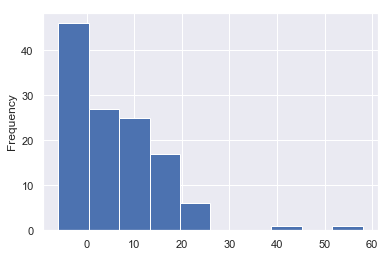

count    123.000000
mean       6.788618
std        9.014789
min       -6.000000
25%        0.000000
50%        5.000000
75%       12.000000
max       58.000000
Name: PlayResult, dtype: float64

In [233]:
feature = 'PlayResult'
where_condition = (pass_play_df['defendersInTheBox'] == 7) & (pass_play_df['numberOfPassRushers'] == 3)

pass_play_df[where_condition][feature].plot('hist')
plt.show()
pass_play_df[where_condition][feature].describe()

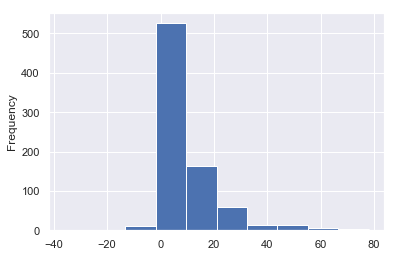

count    796.000000
mean       8.272613
std       11.801601
min      -36.000000
25%        0.000000
50%        5.000000
75%       12.000000
max       78.000000
Name: PlayResult, dtype: float64

In [234]:
feature = 'PlayResult'
where_condition = (pass_play_df['defendersInTheBox'] == 7) & (pass_play_df['numberOfPassRushers'] == 4)

pass_play_df[where_condition][feature].plot('hist')
plt.show()
pass_play_df[where_condition][feature].describe()

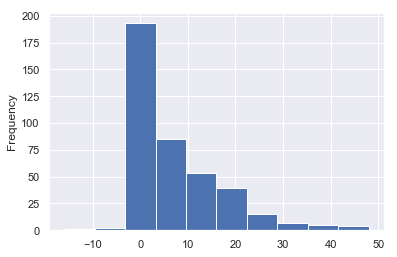

count    404.000000
mean       7.212871
std        9.605842
min      -16.000000
25%        0.000000
50%        4.000000
75%       12.000000
max       48.000000
Name: PlayResult, dtype: float64

In [235]:
feature = 'PlayResult'
where_condition = (pass_play_df['defendersInTheBox'] == 7) & (pass_play_df['numberOfPassRushers'] == 5)

pass_play_df[where_condition][feature].plot('hist')
plt.show()
pass_play_df[where_condition][feature].describe()

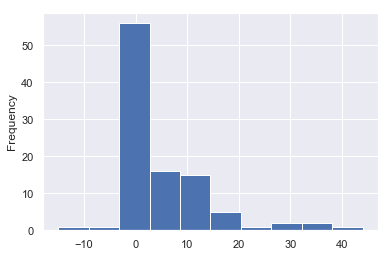

count    100.000000
mean       5.220000
std        8.930235
min      -15.000000
25%        0.000000
50%        0.000000
75%        9.250000
max       44.000000
Name: PlayResult, dtype: float64

In [236]:
feature = 'PlayResult'
where_condition = (pass_play_df['defendersInTheBox'] == 7) & (pass_play_df['numberOfPassRushers'] == 6)

pass_play_df[where_condition][feature].plot('hist')
plt.show()
pass_play_df[where_condition][feature].describe()

### Observations
- Showing a 5 men in box and bringing less usually means less yardage by the offense
    - This trend doesn't exist when 6 men in the box

### Appendix:

In [ ]:
# # Map Routes of concussed player and partner player
# # and give approximate speeds throughout their route
# for i in range(len(injured_players)):
#     # Get necessary values for query of NGS data
#     game_key = injured_players.loc[i, 'GameKey']
#     play_id = injured_players.loc[i, 'PlayID']
#     concussed_id = injured_players.loc[i, 'GSISID']
#     partner_id = injured_players.loc[i, 'Primary_Partner_GSISID']
#     print('GameKey:', game_key, 'PlayID:', play_id)
#     print('Play Description:', injured_players.loc[i,'PlayDescription'])
#     print('Primary Impact Type:', injured_players.loc[i, 'Primary_Impact_Type'])
#     print('Concussed:', concussed_id, 'Role:', injured_players.loc[i, 'Role'])
#     print('Partner:', partner_id)
#     # Visualizing play with .gif file
#     display(HTML(''.join(make_html(game_key, play_id))))
    
#     # Concussed player
#     where_condition = (
#         (ngs_concussion['GameKey'] == game_key)&\
#         (ngs_concussion['PlayID'] == play_id) &\
#         (ngs_concussion['GSISID'] == concussed_id))
#     concussion = ngs_concussion[where_condition].copy()
#     # Reorder by Time and reset index
#     concussion.sort_values(by=['Time'], inplace=True)
#     concussion.reset_index(drop=True, inplace=True)
    
#     # Partner player
#     where_condition = (
#         (ngs_concussion['GameKey'] == game_key)&\
#         (ngs_concussion['PlayID'] == play_id) &\
#         (ngs_concussion['GSISID'] == partner_id))
#     partner = ngs_concussion[where_condition].copy()
#     partner.sort_values(by=['Time'], inplace=True)
#     partner.reset_index(drop=True, inplace=True) 

#     # Variables for Mapping
#     concussion_x = concussion['x']
#     concussion_y = concussion['y']
#     partner_x = partner['x']
#     partner_y = partner['y']
#     speed1 = concussion['dis'] / 0.1
#     speed2 = partner['dis'] / 0.1
    
#     # Mapping of play
#     sns.set()
#     plt.figure(figsize=(10,5))
#     cmap = plt.get_cmap('coolwarm')
#     plt.scatter(concussion_x, concussion_y, c=speed1, cmap=cmap, alpha=0.5)
#     if partner_id != 'NaN':
#         plt.scatter(partner_x, partner_y, c=speed2, cmap=cmap, alpha=0.5)
#     plt.clim(0, 12)
#     plt.colorbar(label='yards/sec')
#     # Normal length of field is 120 yards
#     plt.xlim(-10, 130)
#     plt.xticks(np.arange(0, 130, step=10),
#                ['End', 'Goal Line', '10', '20', '30', '40', '50', '40', '30', '20', '10', 'Goal Line', 'End'])
#     # Normal width is 53.3 yards
#     plt.ylim(-10, 65)
#     plt.yticks(np.arange(0, 65, 53.3), ['Sideline', 'Sideline'])
#     plt.title('Playing Field')
#     plt.xlabel('yardline')
#     plt.ylabel('width of field')
#     plt.show()
#     print('---')